# Combining Different Models for Ensemble Learning

## Learning with ensembles

In [ ]:
from scipy.special import comb
import math

def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier / 2.))
    probs = [comb(n_classifier, k) * error**k * (1-error)**(n_classifier - k)
             for k in range(k_start, n_classifier + 1)]
    return sum(probs)

In [ ]:
ensemble_error(n_classifier=11, error=0.25)

In [ ]:
import numpy as np

error_range = None
ens_errors = None

In [ ]:
import matplotlib.pyplot as plt

plt.plot(error_range, 
         ens_errors, 
         label='Ensemble error', 
         linewidth=2)

plt.plot(error_range, 
         error_range, 
         linestyle='--',
         label='Base error',
         linewidth=2)

plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)

plt.show()

# Bagging : Building an ensemble of classifiers from bootstrap samples

## Applying bagging to classify samples in the Wine dataset

In [4]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

# drop 1 class
df_wine = df_wine[df_wine['Class label'] != 1]

y = df_wine['Class label'].values
X = df_wine[['Alcohol','OD280/OD315 of diluted wines']].values

In [6]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.950000,1.050,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.270000,1.250,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.750000,0.980,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.800000,1.230,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.450000,1.220,2.87,420
64,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.950000,1.450,2.23,355
65,2,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.600000,1.190,2.30,678
66,2,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.300000,1.120,3.18,502
67,2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.680000,1.120,3.48,510
68,2,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.170000,1.020,1.93,750


In [8]:
X,y

(array([[12.37,  1.82],
        [12.33,  1.67],
        [12.64,  1.59],
        [13.67,  2.46],
        [12.37,  2.87],
        [12.17,  2.23],
        [12.37,  2.3 ],
        [13.11,  3.18],
        [12.37,  3.48],
        [13.34,  1.93],
        [12.21,  3.07],
        [12.29,  1.82],
        [13.86,  3.16],
        [13.49,  2.78],
        [12.99,  3.5 ],
        [11.96,  3.13],
        [11.66,  2.14],
        [13.03,  2.48],
        [11.84,  2.52],
        [12.33,  2.31],
        [12.7 ,  3.13],
        [12.  ,  3.12],
        [12.72,  3.14],
        [12.08,  2.72],
        [13.05,  2.01],
        [11.84,  3.08],
        [12.67,  3.16],
        [12.16,  2.26],
        [11.65,  3.21],
        [11.64,  2.75],
        [12.08,  3.21],
        [12.08,  2.27],
        [12.  ,  2.65],
        [12.69,  2.06],
        [12.29,  3.3 ],
        [11.62,  2.96],
        [12.47,  2.63],
        [11.81,  2.26],
        [12.29,  2.74],
        [12.37,  2.77],
        [12.29,  2.83],
        [12.08, 

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


le = LabelEncoder()        # y를 0,1로 바꾼다
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=1, stratify=y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=None, random_state=1)   # 과적합된 모델 여러개를 함께 써서 모델 정확도를 높이며 오버피팅을 방지할 수 있다.

bag = BaggingClassifier(base_estimator=tree, n_estimators=500,   # tree와 bagging classifier를 만들고
                        max_samples=1.0, max_features=1.0,
                        bootstrap=True, bootstrap_features=False,
                        n_jobs=1, random_state=1)

In [26]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Decision tree train/test accuracies 1.000/0.833
Bagging train/test accuracies 1.000/0.917


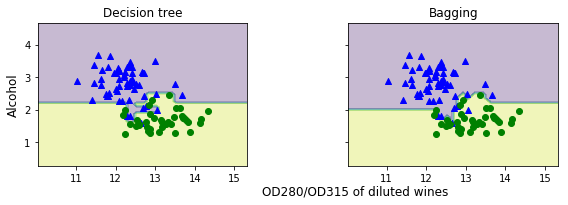

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x_min = X_train[:,0].min()-1
x_max = X_train[:,0].max()+1
y_min = X_train[:,1].min()-1
y_max = X_train[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=2, 
                        sharex='col', 
                        sharey='row', 
                        figsize=(8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, bag],
                        ['Decision tree', 'Bagging']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')

    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='green', marker='o')

    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -0.5,
         s='OD280/OD315 of diluted wines',
         ha='center', va='center', fontsize=12)

plt.tight_layout()

plt.show()            # decision tree에 비해 bagging은 여러 모델을 함께 써서 부드럽게 구분된다

# Leveraging weak learners via adaptive boosting

## Applying AdaBoost using Scikit-learn

In [28]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=1,
                              random_state=1)
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500,
                         learning_rate=0.1,
                         random_state=1)

In [29]:
tree = tree.fit(X_train, y_train)      # 학습시킨다
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train,y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.916/0.875
AdaBoost train/test accuracies 1.000/0.917


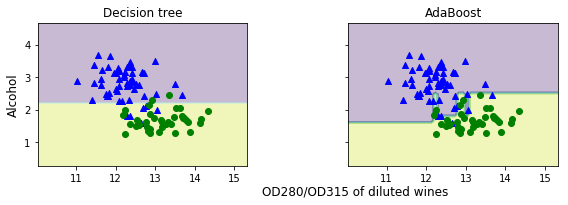

In [30]:
x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max()+1
y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, ada],
                        ['Decision tree', 'AdaBoost']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='green', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -0.5,
         s='OD280/OD315 of diluted wines',
         ha='center', va='center', fontsize=12)

plt.tight_layout()

plt.show()   # decision tree에 비해 AdaBoost는 결정경계 모양이 세밀해진다